In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import os.path as osp
import yaml
import seml
from collections import defaultdict

In [20]:
collection_name = 'week3_spectral_norm_vs_accuracy'
collection = seml.database.get_collection(collection_name)
results = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection.find() if r['status'] in ('COMPLETED',)]

In [21]:
# Reorder results to access them like [dataset]
runs = defaultdict(list)
for result in results:
    config = result['config']
    runs[config['data']['dataset']].append(result)

In [33]:
norm_vs_acc = defaultdict(list)
for dataset, run_list in runs.items():
    for run in run_list:
        config = run['config']
        norm_vs_acc[config['data']['dataset']].append((
            config['model']['weight_scale'],
            run['result']['val_accuracy_mean']['value']))
        
    

In [34]:
norm_vs_acc

defaultdict(list,
            {'cora_ml': [(0.5, 0.27863635927438735),
              (0.75, 0.2785406652092934),
              (1, 0.2789712882041931),
              (1.25, 0.28074162304401395),
              (1.5, 0.2926555034518242),
              (1.75, 0.3315311002731323),
              (2, 0.41263157963752745),
              (2.25, 0.49980861246585845),
              (2.5, 0.592416267991066),
              (2.75, 0.6658373177051544),
              (3.0, 0.7154306226968765),
              (3.25, 0.7545215320587159),
              (3.5, 0.7861961716413498),
              (3.75, 0.8007176995277405),
              (4, 0.8169856470823288),
              (4.25, 0.8254545420408249),
              (4.5, 0.831770333647728),
              (4.75, 0.8352631551027297),
              (5.0, 0.8384928202629089)]})

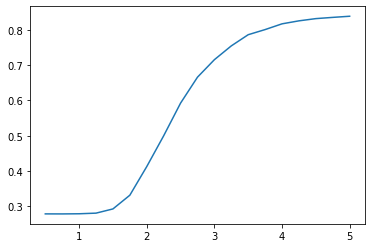

In [35]:
plt.figure()
x, y = np.array(norm_vs_acc['cora_ml']).T
plt.plot(x, y)

In [11]:
results[0]

{'config': {'overwrite': 1,
  'db_collection': 'week3_spectral_norm_vs_accuracy',
  'data': {'dataset': 'cora_ml',
   'num_dataset_splits': 10,
   'test_portion': 0.6,
   'test_portion_fixed': 0.2,
   'train_labels': 'all',
   'train_portion': 0.05,
   'val_labels': 'all',
   'val_portion': 0.15},
  'evaluation': {'perturbations': {'max': 10.0,
    'min': 0.1,
    'num': 20,
    'num_per_sample': 5},
   'pipeline': []},
  'model': {'activation': 'leaky_relu',
   'hidden_sizes': [64],
   'leaky_relu_slope': 0.01,
   'model_type': 'gcn',
   'num_initializations': 10,
   'use_bias': True,
   'use_spectral_norm': True,
   'weight_scale': 0.5},
  'training': {'early_stopping': {'min_delta': 0.001,
    'mode': 'min',
    'monitor': 'val_loss',
    'patience': 100},
   'gpus': 1,
   'learning_rate': 0.003,
   'max_epochs': 1000},
  'seed': 39194330},
 'result': {'val_loss_mean': {'py/object': 'numpy.float64',
   'dtype': 'float64',
   'value': 1.829990073442459},
  'val_accuracy_mean': {'py/o